# Chapter 1

Searching for patterns in data has a long and successful history.  Back to Tycho Brahe's observations in the 16th century and Johannes Kepler discovering the empirical laws of planetary motion.

It is very difficult to design by hand a method that will recognize handwritten digits.  One could use handcrafted rules or heuristics for distinguishing the digits based on the shapes of the strokes, but in practice such an approach leads to a proliferation of rules and exceptions to the rules and so on... this invariably gives bad results!

In a machine learning approach, a *training set* of $N$ digits $\{x_1, ..., x_N\}$ is used to tune the parameters of an adaptive model.  Category of a digit is *target vector* $\bf{t}$.

Result of a machine learning algorithm can be expressed as a function $\bf{y}(\bf{x})$ which takes a new digit image $\bf{x}$ as input and generates on vector $\bf{y}$, encoded in the same way as the target vectors.  The function $\bf{y}(\bf{x})$ is determined during the *training phase*, AKA the *learning phase*.  Once trained, the model can be used on a new set of input data, termed the *test set*.  Ability to categorize correctly new examples that differ from those used for traning is known as *generalization*.  Generalization is a central goal.

*Pre-processing* often occurs in order to make the problem more tractable.  (In handwritten digit recogniztion, the digits are typically translated and scaled so that each digit is contained within a box of a fixed size.)  This greatly reduces the variability within each digit class, because the location and scale of all the digits are now the same.  Pre-processing stage often also called *feature extraction*.

*Supervised learning* - When the training data comprises examples of input vectors along with their corresponding target vectors.  The dataset is "labeled".  *Classification* problems aim to assign each input vector to a finite number of discrete categories.  *Regression* problems are for assinging input vectors to a value for one or more continious variables.

*Unsupervised learning* - When the training data consists of a set of input vectors without any corresponding target values.  The goal may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as *density estimation*, or to project data from a high-dimensional space down to two or three dimensions for the purpose of *visualization*.

*Reinforcement learning* - Concerned with the porblem of finding suitable actions to take in a given situation in order to maximize a reward.  Here the learning algorithm is not given examples of optimal outputs, but must instead discover them by a process of trial and error.  There is a sequence of states and actions in which the learning algorithm is interacting with its environment.  In many cases, the current action not only affects the immediate reward but also has an impact on the reward at all subsequent time steps.  A general feature is the tradeoff between *exploration* in which the system tries out new kinds of actions to see how effective they are, and *exploitation* in which the system makes use of actions that are known to yield a high reward.

## 1.1 Example: Polynomial Curve Fitting

Suppose we observe a real-value input variable $x$ and we wish to use this observation to predict the value of a real-valued target variable $t$.

Generate data from $\sin(2\pi x)$ with random noise in the target variables.

Given a training set comprisiing $N$ observations of $x$, written $\textbf{x} = (x_1,...,x_N)^T$, together with corresponding observations of the values of $t$, denoted $\textbf{t}=(t_1,...,t_N)^T$.  

Generate below for N = 10.  Input data set spaced $x_n$ uniformly for $x=1,...,N$ in range [0,1].  Target data set obtained by first computing the corresponding values of $\sin(2\pi x)$ and then adding a small level of random nosie having a Gaussian distribution.

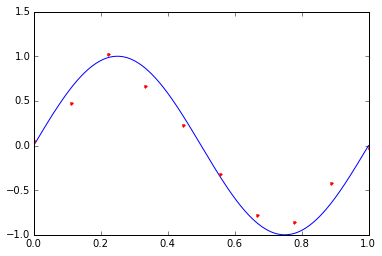

In [165]:
%matplotlib inline
N = 10
import numpy as np
import math
import matplotlib.pyplot as plt

xline = np.linspace(0,1,1000)
tline = np.sin(2 * math.pi * xline)

x = np.linspace(0,1,10)
t = np.sin(2 * math.pi * x) + np.random.randn(1,10)[0]*0.1

plt.plot(xline,tline, color='blue')
plt.plot(x,t,'.', color='red')
plt.show()

By generating data in this way, we are capturing a property of many real data sets, namely that they possess an underlying regularity, which we wish to learn, but that individual observations are corrupted by random noise.

Our goal is to exploit this training set in order ot make predictions of the value $\hat{t}$ of the target variable for some new $\hat{x}$ of the input variable.  This involves implicitly trying to discover the underlying function $\sin(2\pi x)$.  This is intrinsically a dificult problem since we have to generalize from a finite data set.  Furthermore the observed data are corrupted with noise, and so for a given $\hat{x}$ there is uncertainty as to the appropraite value for $\hat{t}$.  Probability theory provides  framework for expressing such uncertainty in a precise and quantitative manner, and decision theory, discussed in Section 1.5, allows us to exploit this probabilistic representaiton in order ot make predictions that are optimal according to appropriate criteria.

For the moment, we shall proceed, rather informally and consider a simple approach based on curve fitting.

In particular, we shall fit the data using a polynomial function of the form:

$$y(x,\textbf{w}) = w_0 + w_1 x + w_2 x^2 + ... + w_M x^M = \sum_{j=0}^M w_j x^j $$

where $M$ is the *order* of the polynomial, and $x^j$ denotes $x$ raised to the power of $j$.  Polynomial coefficients are collectively denoted by the vector $\bf{w}$.  Polynomial function is a nonlinear function of $x$, but it is a linear function of the coefficients $\bf{w}$.  Funcions which are linear in the unknown parameters have important properties and are called *linear models* and will be discussed extensively in Chapters 3 and 4.

Values of the coefficients will be determined by fitting the polynomial to the training data.  This can be done by minimizing an *error function* that measures the misfit between the function $y(x,\textbf{w})$, for any given value of $\textbf{w}$, and the training set of data points.  One simple choice of error function, which is widely used, is given by the sum of the squres of the errors between the predictions $y(x_n,\textbf{w})$ for each data point $x_n$ and the corresponding target values $t_n$, so that we minimize:

$$E(\textbf{w}) = \frac{1}{2} \sum_{n=1}^N \{y(x_n, \textbf{w}) - t_n\}^2 $$

Where the factor of 1/2 is included for later convenice.  We shall discuss the motivation for this choice of error function later in the chapter.  For the moment we simply note that it is a nonnegative quantity that would be zero if, and only if, the function $y(x,\textbf{w})$ were to pass exactly through each training data point.  The geommetrical interpretation of the sum-of-squares error function is illustrated in Figure 1.3.

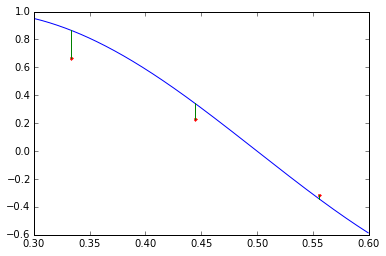

In [166]:
i = 3
j = 6

xlineslice = xline[i*100:j*100]
tlineslice = tline[i*100:j*100]

xslice = x[i:j]
tslice = t[i:j]

plt.plot(xlineslice,tlineslice, color='blue')
plt.plot(xslice,tslice,'.', color='red')

# Plot residuals

#xslice
actualslice = np.sin(2 * math.pi * xslice)
#tslice

for ctr in range(len(tslice)):
    plt.plot([xslice[ctr],xslice[ctr]], [tslice[ctr],actualslice[ctr]],color='green')

plt.show()



We can solve the curve fitting problem by choosing the value for $\textbf{w}$ for which $E(\textbf{w})$ is as small as possible.  Because the error function is a quadratic function of the coefficients $\textbf{w}$, its derivatives with respect to the coefficeints will be linear in the elements of $\textbf{w}$ and so the minimization of the error function has a unique solution, denoted by $\textbf{w}^*$, which can be found in closed form.  The resulting polynomial is given by the function $y(x,\textbf{w}^*)$.

The following **gradient equations** can be written and solved.  The gradient equations apply to all least squares problems.

$$ \frac{\partial}{\partial \textbf{w}} E(\textbf{w}) = \sum_{n=1}^N \{y(x_n, \textbf{w}) - t_n\}  \frac{\partial}{\partial \textbf{w}} y(x_n, \textbf{w}) = 0$$

$$ 0 = \sum_{n=1}^N \{y(x_n, \textbf{w}) - t_n\}  \frac{\partial}{\partial w_k} y(x_n, \textbf{w}) \ \ \text{for} \ \ k = 0,...,M$$



$$ 0 = \sum_{n=1}^N \{\sum_{j=0}^M w_j x^j - t_n\}  \frac{\partial}{\partial w_k} \sum_{j=0}^M w_j x^j \ \ \text{for} \ \ k = 0,...,M$$

$$ 0 = \sum_{n=1}^N \{\sum_{j=0}^M w_j x^j - t_n\} x^k  \ \ \text{for} \ \ k = 0,...,M$$

Since we have a linear least squares model, i.e. it is linear in the elements of $\textbf{w}$, we may find the least squares estimate via the solution to the normal equation:

$$ \hat{\mathbf{\beta}} = (X^TX)^{-1}X^T\textbf{y} $$

Where we have $n$ points $(x_i, y_i)$ and are fitting with polynomial coefficients $w_o, ..., w_M$

$$\begin{bmatrix}y_1 \\y_2 \\ \vdots \\ y_n\end{bmatrix} 
= \begin{bmatrix}1 & x_1 & x_1^2 & ... & x_1^M \\ 
1 & x_2 & x_2^2 & ... & x_2^M \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & ... & x_n^M 
\end{bmatrix} 
\begin{bmatrix}w_0 \\ w_1 \\ \vdots \\ w_M\end{bmatrix}$$



$$\textbf{y} = X \mathbf{\beta}$$

In [218]:
def polyFit(data,M):
    # data should be in the format: n by 2 numpy matrix
    # M is order of polynomial fit
    
    n = data.shape[0]

    # Xmatrix is n by M
    protomatrix = np.zeros((n,M+1))
    Xmatrix = np.matrix(protomatrix)
    for i in range(n):
        for j in range(M+1):
            Xmatrix[i,j] = data[i,0] ** j
    
    # yvec is an n-dimensional vector of target values
    yvec = data[:,1]
    yvecmatrix = np.matrix(yvec).T
    
    # Find optimal parameters by solving the normal equation
    beta = (Xmatrix.T * Xmatrix).I  * Xmatrix.T *yvecmatrix
    
    # Prepare for plotting
    minx = min(data[:,0])
    maxx = max(data[:,0])
    #minx = minx - (maxx-minx)/10
    #maxx = maxx + (maxx-minx)/10
    xx = np.linspace(minx, maxx, 200)
    
    # Plot polynomial fit
    y = np.array(xx*0)
    for j in range(M+1):
        y = y + beta[j]*xx**j
        
    plt.figure(1)
    plt.plot(xx, y.T, color='r')
    
    # Plot noisy data
    plt.scatter(data[:,0],data[:,1],marker='o',facecolors='none',edgecolors='blue') 
    
    # Plot underlying distribution
    plt.plot(xline,tline, color='green')
    
    
    plt.axis([-0.2,1.2,-1.2,1.2])
    plt.show()

0


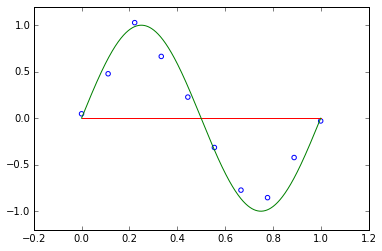

1


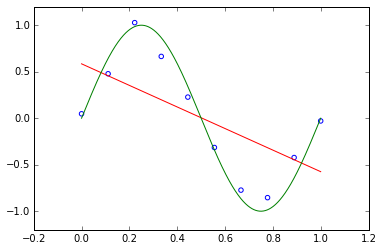

2


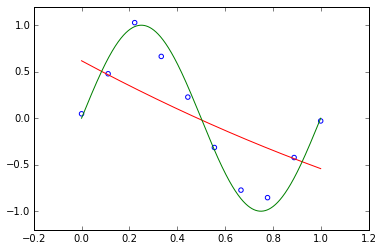

3


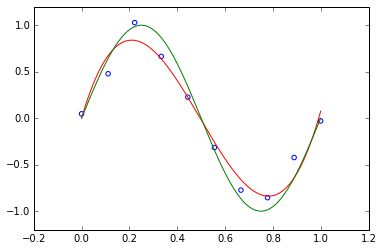

4


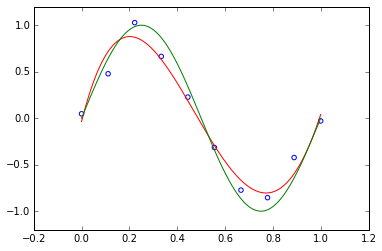

5


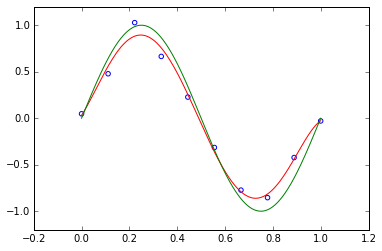

6


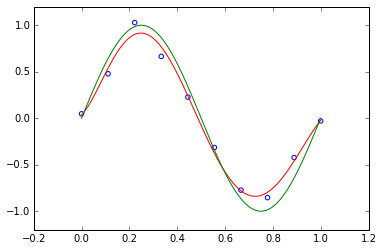

7


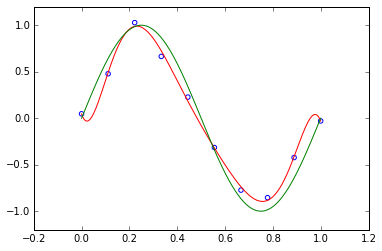

8


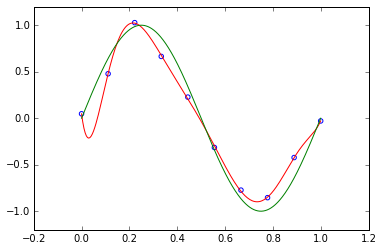

9


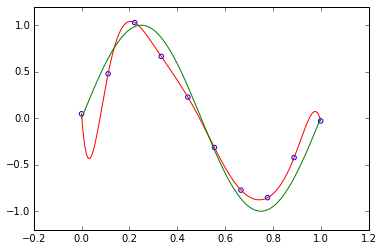

In [220]:
data = np.vstack((x,t)).T
for M in range(0,10):
    print M
    polyFit(data,M)